## Sports Analytics Notebook
#### by Trevor Alback started 1/4/2022

In [1]:
# This NBA api is somewhat free, if you sigh up, you can get free calls, but not to all data.
# Try another way

import http.client

conn = http.client.HTTPSConnection("api-nba-v1.p.rapidapi.com")

headers = {
    'X-RapidAPI-Host': "api-nba-v1.p.rapidapi.com",
    'X-RapidAPI-Key': "a77dba0749mshc84499458a980c3p12cfbcjsn2aee80739e7e"
    }

conn.request("GET", "/seasons", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"message":"You are not subscribed to this API."}


In [ ]:
## There is an nba_api package which is an api client to get data from nba.com
## https://pypi.org/project/nba-api/

In [3]:
# pip install the package to access the libraries
# pip install nba_api


  Created wheel for nba-api: filename=nba_api-1.1.11-py3-none-any.whl size=251492 sha256=a33e053f518a45ca9bf53049a85cbe048a9660d85fb35f4ac03a8f8627855552
  Stored in directory: c:\users\tjalb\appdata\local\pip\cache\wheels\96\0a\d6\0e51f16e26a046ed08ce8266c86011c74bf57678cd62ad71b0
Successfully built nba-api


In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt

In [10]:
# Example data extract below: find league leaders
# Access leagueleaders module through endpoints & assign the class to "data"
data = endpoints.leagueleaders.LeagueLeaders() 

# Create a league leaders data frame (ll_df) using "data" variable and its built in functions
ll_df = data.league_leaders.get_data_frame()

In [11]:
ll_df.head()

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,201942,1,DeMar DeRozan,CHI,72,2605,739,1462,0.505,48,...,385,360,64,24,170,168,2019,1888,2.12,0.38
1,1629027,2,Trae Young,ATL,71,2472,661,1437,0.460,216,...,265,682,71,7,282,117,2000,1918,2.42,0.25
2,1628369,3,Jayson Tatum,BOS,72,2608,673,1491,0.451,219,...,578,310,69,46,207,168,1946,1862,1.50,0.33
3,203507,4,Giannis Antetokounmpo,MIL,63,2075,650,1173,0.554,69,...,735,366,66,90,209,202,1897,2220,1.75,0.32
4,203954,5,Joel Embiid,PHI,63,2114,600,1223,0.491,85,...,722,267,73,91,194,171,1890,2091,1.38,0.38


In [25]:
print(ll_df.shape)
ll_df.columns

(597, 27)


Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF',
       'AST_TOV', 'STL_TOV'],
      dtype='object')

In [26]:
#ll_df.info()

In [24]:
help(endpoints)

Help on package nba_api.stats.endpoints in nba_api.stats:

NAME
    nba_api.stats.endpoints

PACKAGE CONTENTS
    _base
    alltimeleadersgrids
    assistleaders
    assisttracker
    boxscoreadvancedv2
    boxscoredefensive
    boxscorefourfactorsv2
    boxscorematchups
    boxscoremiscv2
    boxscoreplayertrackv2
    boxscorescoringv2
    boxscoresimilarityscore
    boxscoresummaryv2
    boxscoretraditionalv2
    boxscoreusagev2
    commonallplayers
    commonplayerinfo
    commonplayoffseries
    commonteamroster
    commonteamyears
    cumestatsplayer
    cumestatsplayergames
    cumestatsteam
    cumestatsteamgames
    defensehub
    draftboard
    draftcombinedrillresults
    draftcombinenonstationaryshooting
    draftcombineplayeranthro
    draftcombinespotshooting
    draftcombinestats
    drafthistory
    fantasywidget
    franchisehistory
    franchiseleaders
    franchiseplayers
    gamerotation
    glalumboxscoresimilarityscore
    homepageleaders
    homepagev2
    hustles

In [28]:
# What are we looking for? Let's import player info from static and get some example unique ID's
# See bottom of below link for reference on accessing player and team id's
# https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb

In [55]:
from nba_api.stats.static import players
nba_players = players.get_players()
nba_players[:3]

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False}]

In [66]:
# Find a unique player id for a player by full name
# Names are case sensitive
KD = [player for player in nba_players if player['full_name'] == 'Kevin Durant'][0]
print(KD)
print('--------')
KD_ID = KD['id']
print(KD_ID)

{'id': 201142, 'full_name': 'Kevin Durant', 'first_name': 'Kevin', 'last_name': 'Durant', 'is_active': True}
--------
201142


In [56]:
print('Number of players fetched: {}'.format(len(nba_players)))

Number of players fetched: 4723


In [70]:
d = {"foo": 1, "bar": 2, "baz": 1}
keys_for_1 = [k for k in d if d[k] == 1]
print(keys_for_1)

['foo', 'baz']


I wanted to see how many players in this list had the last name 'Jordan'. I wondered how many more Jordans there were on top of Michael Jordan and DeAndre Jordan.  

In [122]:
how_many_Jordans = 0
Jordans_info = []
for i in range(len(nba_players)):
    if nba_players[i]['last_name'] == 'Jordan':
        Jordans_info.append(nba_players[i])
        how_many_Jordans += 1
print('There are {} Jordans in this NBA player list'.format(how_many_Jordans))

There are 8 Jordans in this NBA player list


In [123]:
# who are they
for Jordan in range(len(Jordans_info)):
    print(Jordans_info[Jordan]['full_name'])

Adonis Jordan
DeAndre Jordan
Eddie Jordan
Jerome Jordan
Michael Jordan
Reggie Jordan
Thomas Jordan
Walter Jordan


What about players with the first name 'James'? I knew of James Harden, James Worthy, James Johnson.

In [124]:
how_many_Jameses = 0
James_info = []
for i in range(len(nba_players)):
    if nba_players[i]['first_name'] == 'James':
        James_info.append(nba_players[i])
        how_many_Jameses += 1
print('There are {} players with the first name of James'.format(how_many_Jameses))

There are 31 players with the first name of James


In [125]:
for James in range(len(James_info)):
    print(James_info[James]['full_name'])

James Anderson
James Augustine
James Bailey
James Blackwell
James Bouknight
James Collins
James Cotton
James Davis
James Donaldson
James Edwards
James Ennis III
James Harden
James Hardy
James Johnson
James Jones
James Lang
James Nunnally
James Owens
James Posey
James Robinson
James Scott
James Silas
James Singleton
James Southerland
James Thomas
James Webb III
James White
James Wilkes
James Wiseman
James Worthy
James Young


In [128]:
# team Ids
from nba_api.stats.static import teams 
NBA_teams = teams.get_teams()
print('There are {} teams in this list of dictionaries of NBA teams.'.format(len(NBA_teams)))

There are 30 teams in this list of dictionaries of NBA teams.


In [132]:
# Golden State Warriors team id
GSW = [x for x in NBA_teams if x['full_name'] == 'Golden State Warriors'][0]
GSW_ID = GSW['id']
GSW_ID

1610612744

In [131]:
GSW

{'id': 1610612744,
 'full_name': 'Golden State Warriors',
 'abbreviation': 'GSW',
 'nickname': 'Warriors',
 'city': 'Golden State',
 'state': 'California',
 'year_founded': 1946}

We want player id and team id so we can extract other data. 
Let's have a look at Kevin Durant (my favourite player!) and the fan favourite GSW.
From earlier:

In [134]:
print(KD_ID)
print(GSW_ID)

201142
1610612744


In [159]:
# Kevin Durant
KD_career = playercareerstats.PlayerCareerStats(player_id=str(KD_ID))
KD_yby = KD_career.get_data_frames()[0]
KD_yby.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201142,2007-08,00,1610612760,SEA,19.0,80,80,2768.0,587,...,0.873,70,278,348,192,78,75,232,122,1624
1,201142,2008-09,00,1610612760,OKC,20.0,74,74,2885.0,661,...,0.863,77,405,482,205,96,53,225,134,1871
2,201142,2009-10,00,1610612760,OKC,21.0,82,82,3239.0,794,...,0.900,105,518,623,231,112,84,271,171,2472
3,201142,2010-11,00,1610612760,OKC,22.0,78,78,3038.0,711,...,0.880,57,476,533,214,88,76,218,159,2161
4,201142,2011-12,00,1610612760,OKC,23.0,66,66,2546.0,643,...,0.860,40,487,527,231,88,77,248,133,1850


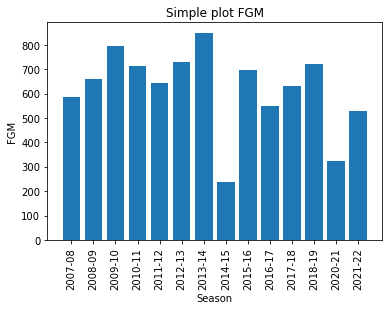

In [175]:
fig, ax = plt.subplots()
ax.bar(KD_yby['SEASON_ID'], KD_yby['FGM'])

ax.set(xlabel='Season', ylabel='FGM',
       title='Simple plot FGM')
plt.xticks(rotation=90)
ax.grid(False)

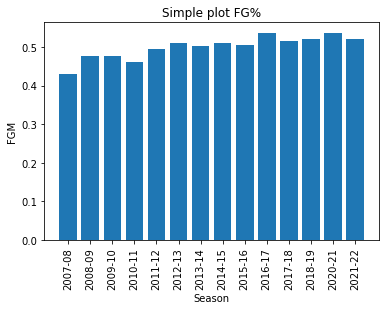

In [176]:
fig, ax = plt.subplots()
ax.bar(KD_yby['SEASON_ID'], KD_yby['FG_PCT'])

ax.set(xlabel='Season', ylabel='FGM',
       title='Simple plot FG%')
plt.xticks(rotation=90)
ax.grid(False)